# Generiert Graphiken für Skript

In [59]:
import BusinessAnalytics as BA
from BusinessAnalytics import get_stock_data, plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## DAX 1988 - 2022

In [ ]:
dax = get_stock_data("^GDAXI", start="01-01-1987", end="31-07-2022")

In [78]:
idx = np.argmax(dax["Adj Close"])
dax.iloc[idx]

Date         2022-01-05 00:00:00
Open                 16177.44043
High                16285.349609
Low                 16161.719727
Close                   16271.75
Adj Close               16271.75
Volume                68244500.0
ticker                    ^GDAXI
Name: 8760, dtype: object

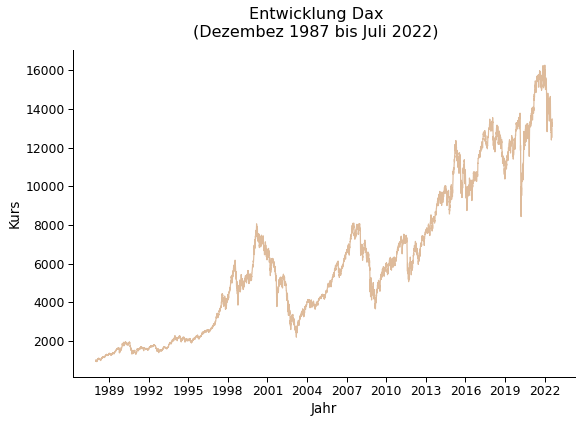

In [75]:
color = BA.plotting.COLORS[5]
ax = plot(data=dax, x="Date", y="Adj Close", 
     title="Entwicklung Dax\n(Dezember 1987 bis Juli 2022)", 
     ylabel="Kurs", xlabel="Jahr", show_legend=False,
     colors=color )

ax.xaxis.set_major_locator(mdates.YearLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.savefig("Dax.png", dpi=200)

In [88]:
start = 898
ende = 3453
dax.iloc[[start, ende]]["Adj Close"].pct_change()

898          NaN
3453    2.372615
Name: Adj Close, dtype: float64

In [101]:
start = pd.to_datetime("12.04.2007")
ende = pd.to_datetime("19.12.2008")
dax.set_index("Date")[start:ende]["Adj Close"]

4696/7808 - 1

-0.39856557377049184

## 6 fiktive Portfolien

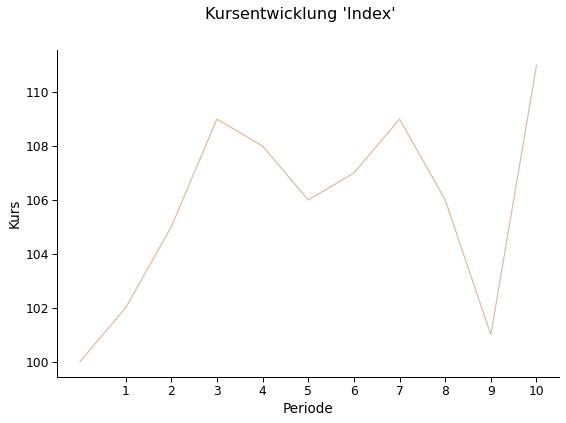

In [330]:
days = np.arange(0,11)
rets = np.array([ 0.00, 0.02, 0.03, 0.04, -0.01, 	-0.02, 0.01, 0.02, 	-0.03, -0.05,0.10 ])
start = 100
index = start * np.cumprod((1+rets))
data = pd.DataFrame({"Kurs": np.round(index), "Periode": days, "rt":rets})
ax = plot(data, x="Periode", y="Kurs", 
          show_legend=False, colors=color, title="Kursentwicklung 'Index'")
ax.set_xticks(days[1:])
ax.set_xticklabels(days[1:])
plt.savefig("Index_Beispiel.png", dpi=50)

In [294]:
def replace_first_row(_df, to_replace=np.nan, value=1):
    cols = _df.columns
    _df.iloc[0] = _df.iloc[0].replace(to_replace=to_replace, value=value)
    return _df

In [301]:
data_new = (data
        .assign(**{f"Anlage_{i}":data["rt"].iloc[1:].add(1).shift(-i+1).cumprod() for i in np.arange(1,n)})
        .pipe(replace_first_row, np.nan, 1)
        #.melt(id_vars=["Periode", "Kurs", "rt"], var_name="Portfolio")
        )
data_new

,Kurs,Periode,rt,Anlage_1,Anlage_2,Anlage_3,Anlage_4,Anlage_5,Anlage_6
0,100.0,0,0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,102.0,1,0.02,1.020000,1.030000,1.040000,0.990000,0.980000,1.010000
2,105.0,2,0.03,1.050600,1.071200,1.029600,0.970200,0.989800,1.030200
3,109.0,3,0.04,1.092624,1.060488,1.009008,0.979902,1.009596,0.999294
4,108.0,4,-0.01,1.081698,1.039278,1.019098,0.999500,0.979308,0.949329
5,106.0,5,-0.02,1.060064,1.049671,1.039480,0.969515,0.930343,1.044262
6,107.0,6,0.01,1.070664,1.070664,1.008296,0.921039,1.023377,NaN
7,109.0,7,0.02,1.092078,1.038545,0.957881,1.013143,NaN,NaN
8,106.0,8,-0.03,1.059315,0.986617,1.053669,NaN,NaN,NaN
9,101.0,9,-0.05,1.006350,1.085279,NaN,NaN,NaN,NaN


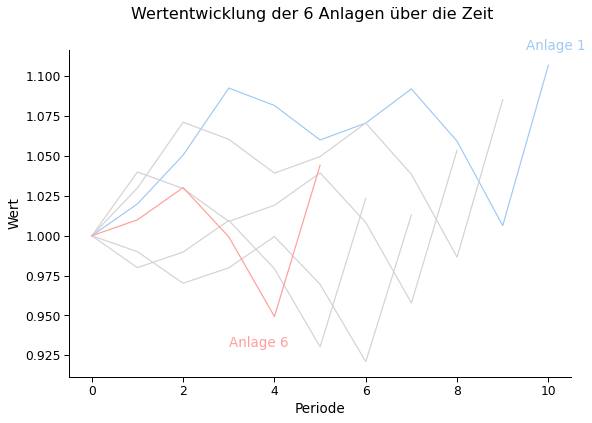

In [327]:
colors = BA.plotting.COLORS
ax = plot(data=data_new, x="Periode", y=[col for col in data_new.columns if "Anlage" in col], 
        colors=[colors[0], "lightgrey", "lightgrey", "lightgrey", "lightgrey", colors[3]], 
        show_legend=False, xlabel="Periode", ylabel="Wert", title="Wertentwicklung der 6 Anlagen über die Zeit")


xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.annotate("Anlage 1", (xmax-1, ymax), color=colors[0] )
ax.annotate("Anlage 6", (3,0.93), color=colors[3])
plt.savefig("Anlagen_perf.png", dpi=200)

<AxesSubplot:xlabel='Periode', ylabel='value'>

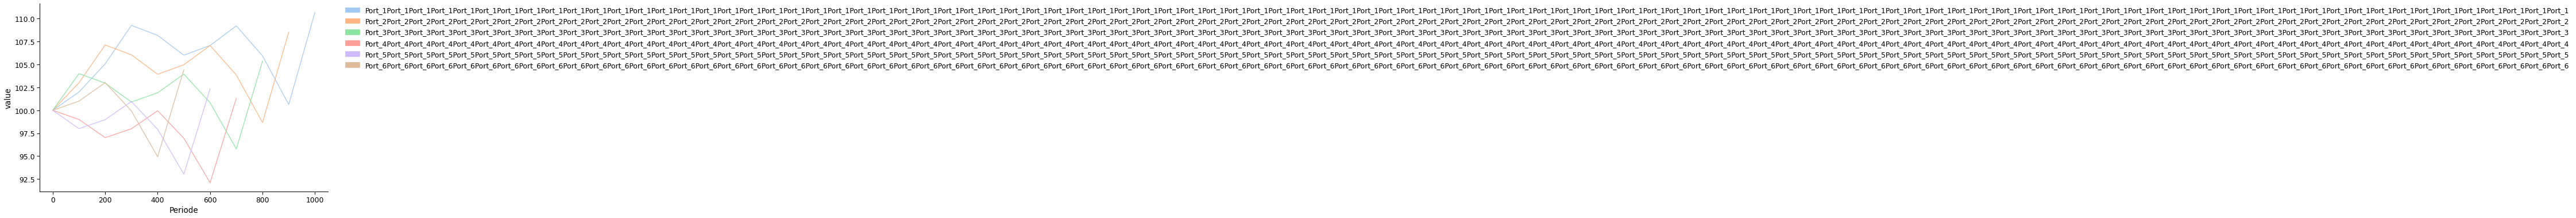

In [298]:
plot(data=data_new, x="Periode", y="value", hue="Portfolio")

In [293]:
days = np.arange(0,11)
rets = np.array([ 0.00, 0.02, 0.03, 0.04, -0.01, 	-0.02, 0.01, 0.02, 	-0.03, -0.05,0.10 ])
start = 100

df = pd.DataFrame({"time": days, "return":rets})

new_df = (df
.assign(**{f"lag_{i}":df["return"].add(1).iloc[1:].shift(-i).cumprod() for i in np.arange(6)})
.pipe(replace_first_row, np.nan, 1)
)

new_df

,time,return,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5
0,0,0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0.02,1.020000,1.030000,1.040000,0.990000,0.980000,1.010000
2,2,0.03,1.050600,1.071200,1.029600,0.970200,0.989800,1.030200
3,3,0.04,1.092624,1.060488,1.009008,0.979902,1.009596,0.999294
4,4,-0.01,1.081698,1.039278,1.019098,0.999500,0.979308,0.949329
5,5,-0.02,1.060064,1.049671,1.039480,0.969515,0.930343,1.044262
6,6,0.01,1.070664,1.070664,1.008296,0.921039,1.023377,NaN
7,7,0.02,1.092078,1.038545,0.957881,1.013143,NaN,NaN
8,8,-0.03,1.059315,0.986617,1.053669,NaN,NaN,NaN
9,9,-0.05,1.006350,1.085279,NaN,NaN,NaN,NaN


In [252]:
[col for col in new_df.columns if "lag" in col]

['lag_0', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']